In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

from : https://www.youtube.com/watch?v=zp8clK9yCro

In [12]:
transform = transforms.ToTensor()

# transform = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.5),(0.5))
# ])
mnist_data = datasets.MNIST(root='./data', train=True, transform=transform, download=True)


In [13]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_data,
                                          batch_size =64,
                                          shuffle=True)

In [14]:
dataiter = iter(data_loader)
images, labels = dataiter.next()
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [19]:
class Autoencoder_linear(nn.Module):
    def __init__(self):
        
        super().__init__()
        # N = 784
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12,3) # output size = N * 3
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(3,12),
            nn.ReLU(),
            nn.Linear(12,64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128,28*28), # output size = N * 784
            nn.Sigmoid()
        )
        
        
    
    def forward(self, X):
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return decoded

In [20]:
model = Autoencoder_linear()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [22]:
num_epochs = 10
outputs = []

for epoch in range(num_epochs):
    for (img, _) in data_loader:
        img = img.reshape(-1,28*28)
        recon = model(img)
        loss = criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(epoch+1, "loss: ", loss.item())
    outputs.append((epoch, img, recon))

1 loss:  0.04629414901137352
2 loss:  0.04131777957081795
3 loss:  0.042074743658304214
4 loss:  0.03714621439576149
5 loss:  0.03944559022784233
6 loss:  0.03755117952823639
7 loss:  0.0329342819750309
8 loss:  0.03713351488113403
9 loss:  0.03647006303071976
10 loss:  0.0356537401676178


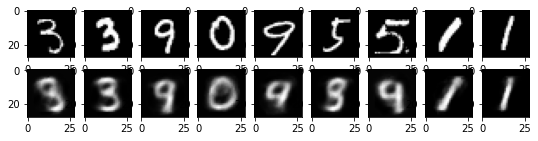

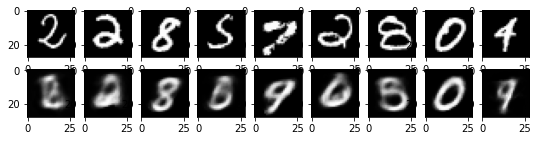

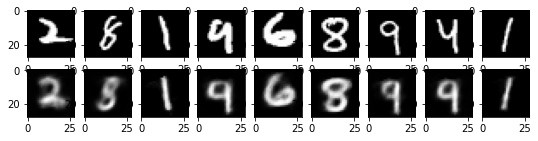

In [24]:
for k in range(0, num_epochs, 4):
    plt.figure(figsize=(9,2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i>= 9:
            break
        plt.subplot(2,9, i+1)
        item = item.reshape(-1,28,28)
        plt.imshow(item[0])
    
    for i,item in enumerate(recon):
        if i>=9:
            break
        plt.subplot(2,9,9+i+1)
        item = item.reshape(-1,28,28)
        plt.imshow(item[0])
        

In [29]:
class Autoencoder(nn.Module):
    def __init__(self):
        
        super().__init__()
        # N 1, 28,28
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1), # N 16, 14, 14
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1), # N, 32, 7,7
            nn.ReLU(),
            nn.Conv2d(32, 64, 7) # N, 64, 1, 1
        )
        
        # N, 64, 1,1
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64,32,7), # 32, 7,7
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16,3, stride=2, padding=1, output_padding=1),# N, 16,14,14
            nn.ReLU(),
            nn.ConvTranspose2d(16,1,3,stride=2, padding=1, output_padding=1), # N , 1,28,28
            nn.Sigmoid()
        )
        
        
    
    def forward(self, X):
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return decoded
    
# maxpool2d -> nn.maxpool2d

In [30]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [ ]:
num_epochs = 10
outputs = []

for epoch in range(num_epochs):
    for (img, _) in data_loader:
#         img = img.reshape(-1,28*28)
        recon = model(img)
        loss = criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(epoch+1, "loss: ", loss.item())
    outputs.append((epoch, img, recon))

1 loss:  0.010805396363139153
2 loss:  0.005372085142880678
3 loss:  0.004002600442618132


In [ ]:
for k in range(0, num_epochs, 4):
    plt.figure(figsize=(9,2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i>= 9:
            break
        plt.subplot(2,9, i+1)
#         item = item.reshape(-1,28,28)
        plt.imshow(item[0])
    
    for i,item in enumerate(recon):
        if i>=9:
            break
        plt.subplot(2,9,9+i+1)
#         item = item.reshape(-1,28,28)
        plt.imshow(item[0])